In [1]:
import numpy as np

In [32]:
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [204]:
X, y = make_blobs(n_samples=30, centers=2, n_features=2)

In [249]:
class cluster():
    
    def __init__(self, loc):
        self.loc = loc
        self.data = []
        
    def update_mean(self):
        means = []
        self.loc = np.mean(self.data,0)
        
    def calc_distance(self, point):
        dist = np.linalg.norm(self.loc-point)
        return dist
        
    def add_data(self,data):
        temp = list(self.data)
        temp.append(data)
        self.data = np.array(temp)

    
class kmeans():
    def __init__(self, n_clusters, data, tol = 0.0001):
        self.n_clusters = n_clusters
        self.data = data
        self.tol = tol
        self.clusters = []
        
        # Seed clusters
        cluster_seed = np.random.choice(len(self.data), self.n_clusters, replace=False)
        for i in (cluster_seed):
            self.clusters.append(cluster(self.data[i]))
        
    def fit_step(self):
        # Clear data from hold:
        for i in self.clusters:
            i.data = []
        mean_hold = []
        for i in self.clusters:
            mean_hold.append(i.loc)
        for i in self.data:
            cluster_index = 0
            min_distance = float('inf')
            for index, j in enumerate(self.clusters):
                dist = j.calc_distance(i)
                if dist<min_distance:
                    min_distance = dist
                    cluster_index = index
            self.clusters[cluster_index].add_data(i)
        
        for i in self.clusters:
            i.update_mean()
        
        
        for index, i in enumerate(mean_hold):
            if np.linalg.norm(i-self.clusters[index].loc) > self.tol:
                return False
        return True
        
    
    def fit(self, n_steps):
        flag = True
        for _ in range(n_steps):
            if self.fit_step():
                print('Tol reached after {} steps, finished fitting'.format(_))
                flag = False
                break
        if flag:
            print('N_steps reached, may want to run more')    

In [260]:
test = kmeans(2, X)

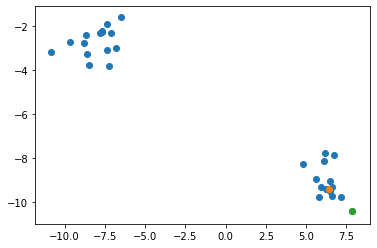

In [261]:
plt.scatter(X[:,0],X[:,1])
for i in test.clusters:
    plt.scatter(i.loc[0],i.loc[1])

In [262]:
test.fit(100)

Tol reached after 2 steps, finished fitting


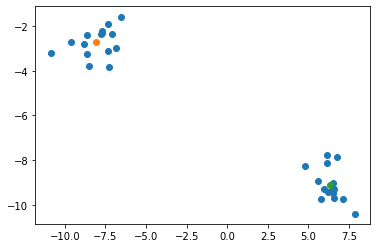

In [263]:
plt.scatter(X[:,0],X[:,1])
for i in test.clusters:
    plt.scatter(i.loc[0],i.loc[1])